In [5]:
import pandas as pd

# Load data
data = pd.read_csv('heart.csv')

# 1. Check for missing values
print(" Missing Values:")
print(data.isnull().sum())
 
# 2. Check class balance in the target variable
if 'target' in data.columns:
    print("\nClass Balance in 'target':")
    print(data['target'].value_counts())
    print("\nPercentage Distribution:")
    print(data['target'].value_counts(normalize=True) * 100)
else:
    print("\n❌ 'target' column not found in the dataset.")


 Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Class Balance in 'target':
target
1    526
0    499
Name: count, dtype: int64

Percentage Distribution:
target
1    51.317073
0    48.682927
Name: proportion, dtype: float64


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the dataset
try:
    data = pd.read_csv('heart.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'heart.csv' file not found.")
    exit()

# Check the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Prepare the features and target variable
X = data.drop('target', axis=1)  # Assuming 'target' is the column for heart disease
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training completed.")

# Save the trained model
joblib.dump(model, 'heart_disease_model.pkl')
print("Model trained and saved as 'heart_disease_model.pkl'")

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Make predictions
y_pred = model.predict(X_test)

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"\n F1 Score: {f1:.4f}")

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\n Accuracy: {acc:.4f}")

# Optional: Full Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


Dataset loaded successfully.
First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
Data split into training and testing sets.
Model training completed.
Model trained and saved as 'heart_disease_model.pkl'

 F1 Score: 0.9852

 Accuracy: 0.9854

 Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00    

<Axes: >

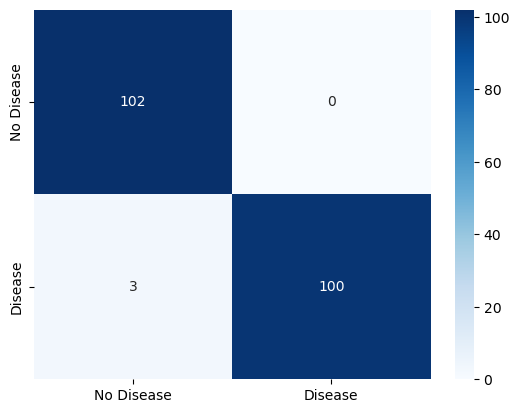

In [3]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Predict on test set
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create DataFrame for better labeling
labels = ['No Disease', 'Disease']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot using seaborn heatmap
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')


In [4]:
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('heart_disease_model.pkl')

# Function to predict heart disease
def predict_heart_disease(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Log the input data for debugging
    print("Input data for prediction:", input_df)

    # Make prediction
    prediction = model.predict(input_df)
    
    # Log the prediction result
    print("Prediction result:", prediction[0])
    
    return prediction[0]

# Example usage
if __name__ == "__main__":
    # Example input data (replace with actual data)
    input_data = {
        'age': 63,
        'sex': 1,
        'cp': 3,
        'trestbps': 145,
        'chol': 233,
        'fbs': 1,
        'restecg': 0,
        'thalach': 150,
        'exang': 0,
        'oldpeak': 2.3,
        'slope': 1,
        'ca': 0,
        'thal': 1
    }
    
    result = predict_heart_disease(input_data)
    print("Predicted heart disease:", "Yes" if result == 1 else "No")


Input data for prediction:    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      1   

   ca  thal  
0   0     1  
Prediction result: 1
Predicted heart disease: Yes


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# Load data
data = pd.read_csv('heart.csv')


# Prepare features and target
X = data.drop('target', axis=1)
y = data['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("\n🧪 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"🎯 F1 Score: {f1_score(y_test, y_pred):.4f}")

import joblib

# Save the model
joblib.dump(model, 'xgboost_heart_model.pkl')
print("Model saved as 'xgboost_heart_model.pkl'")



🧪 Confusion Matrix:
[[102   0]
 [  3 100]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

✅ Accuracy: 0.9854
🎯 F1 Score: 0.9852
Model saved as 'xgboost_heart_model.pkl'


In [10]:
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('xgboost_heart_model.pkl')

# Function to predict heart disease
def predict_heart_disease(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Log the input data for debugging
    print("Input data for prediction:", input_df)

    # Make prediction
    prediction = model.predict(input_df)
    
    # Log the prediction result
    print("Prediction result:", prediction[0])
    
    return prediction[0]

# Example usage
if __name__ == "__main__":
    # Example input data (replace with actual data)
    input_data = {
        'age': 63,
        'sex': 1,
        'cp': 3,
        'trestbps': 145,
        'chol': 233,
        'fbs': 1,
        'restecg': 0,
        'thalach': 150,
        'exang': 0,
        'oldpeak': 2.3,
        'slope': 1,
        'ca': 0,
        'thal': 1
    }
    
    result = predict_heart_disease(input_data)
    print("Predicted heart disease:", "Yes" if result == 1 else "No")


Input data for prediction:    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      1   

   ca  thal  
0   0     1  
Prediction result: 1
Predicted heart disease: Yes


<Axes: >

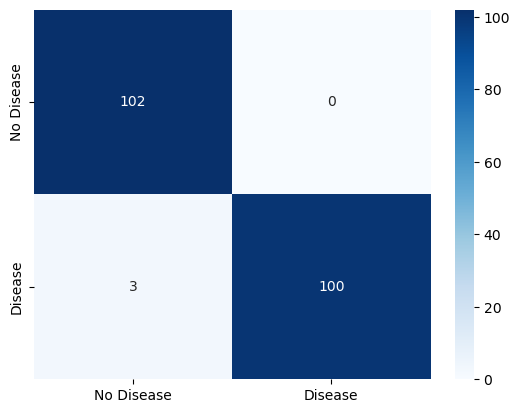

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Predict on test set
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create DataFrame for better labeling
labels = ['No Disease', 'Disease']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot using seaborn heatmap
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

# === Step 1: Load the dataset ===
df = pd.read_csv("heart.csv")

# === Step 2: Split into features and label ===
X = df.drop(columns=["target"])  # Assuming 'target' is the label
y = df["target"]

# === Step 3: Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Step 4: Feature scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Step 5: Define base models ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# === Step 6: Soft voting ensemble ===
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    voting='soft'
)

# === Step 7: Train ensemble ===
voting_clf.fit(X_train_scaled, y_train)

# === Step 8: Predictions & evaluation ===
y_pred = voting_clf.predict(X_test_scaled)
y_proba = voting_clf.predict_proba(X_test_scaled)[:, 1]

print(" Classification Report:")
print(classification_report(y_test, y_pred))

print(f" Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f" AUC-ROC:   {roc_auc_score(y_test, y_proba):.4f}")


 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

 Accuracy:  1.0000
 AUC-ROC:   1.0000


c:\Users\sinha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


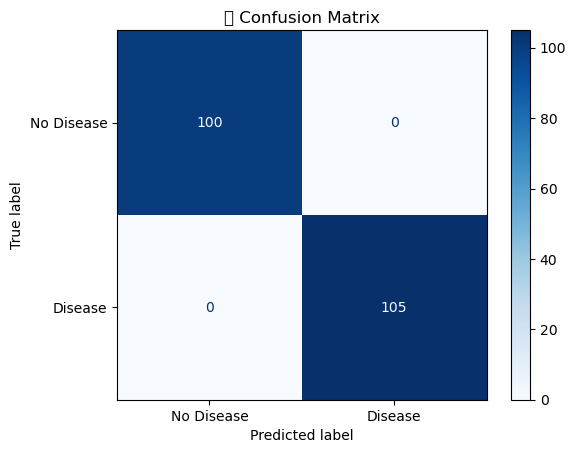

c:\Users\sinha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


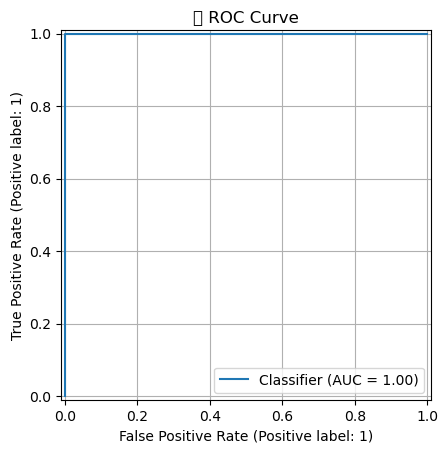

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap="Blues")
plt.title("🧠 Confusion Matrix")
plt.grid(False)
plt.show()

# === ROC Curve ===
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("📈 ROC Curve")
plt.grid(True)
plt.show()
